In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import sklearn.linear_model as linear_model
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Load first 5 rows of the Dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Replace lowercase column name with uppercase column name
df.rename(columns={'customerID': 'CustomerID'}, inplace=True)
df.rename(columns={'gender': 'Gender'}, inplace=True)
df.rename(columns={'tenure': 'Tenure'}, inplace=True)

In [5]:
# Checking Missing Values
df.isnull().sum()

,0
CustomerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
df.dtypes

,0
CustomerID,object
Gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
Tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [10]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# Check no. of rows and columns
df.shape

(7043, 21)

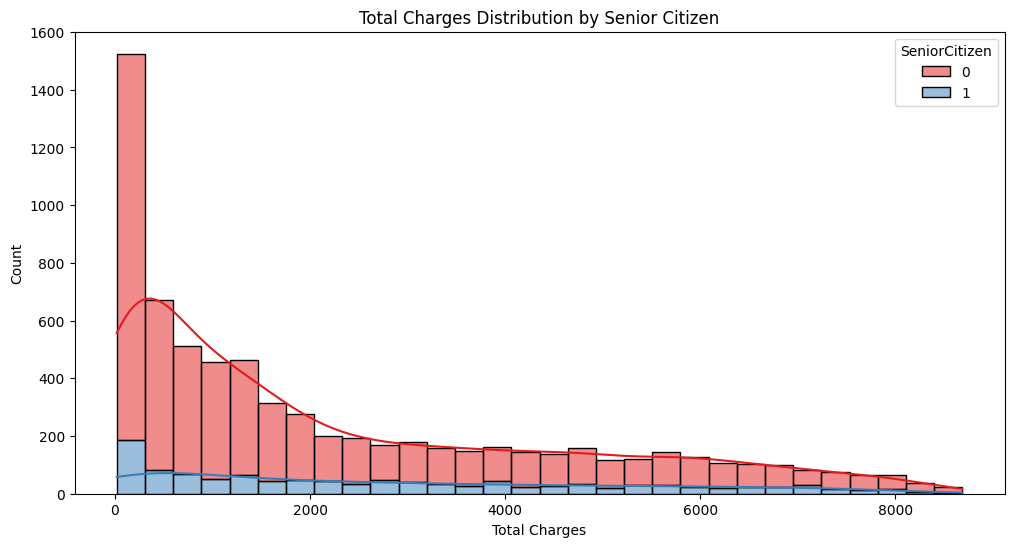

In [12]:
# Visualization for total charges based on the gender and seniorcitizen or not
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='TotalCharges', hue='SeniorCitizen', multiple='stack', bins=30, kde=True , palette='Set1')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Total Charges Distribution by Senior Citizen')
plt.show()


In [13]:
df.dtypes

,0
CustomerID,object
Gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
Tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [14]:
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    if column != 'Churn':  # Skip the target column for now
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

In [15]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [16]:
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [17]:
# Select numerical columns for scaling
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

# Standardize the data
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [18]:
x = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

In [19]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Train the Random Forest model
rfc = RandomForestClassifier(random_state=42, n_estimators=100)
rfc.fit(x_train, y_train)

# Make predictions
y_pred = rfc.predict(x_test)
y_prob = rfc.predict_proba(x_test)[:, 1]

In [21]:
# Classification report
print("Classification Report:\n\n\n", classification_report(y_test, y_pred))

Classification Report:


               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [22]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[946  90]
 [196 177]]


In [23]:
# ROC-AUC score
roc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_score:.2f}")

ROC-AUC Score: 0.84


In [24]:
# Train and evaluate models
results = {}
results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred)
    }

               Accuracy  Precision    Recall  F1-score
Random Forest  0.797019   0.662921  0.474531  0.553125


<Figure size 1000x600 with 0 Axes>

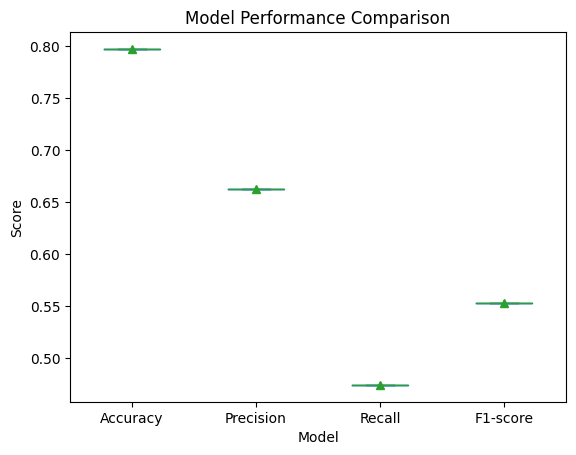

In [25]:
# Convert results to DataFrame
results_df = pd.DataFrame([results], index=['Random Forest'])
print(results_df)
# Plot results_df
plt.figure(figsize=(10, 6))
results_df.plot(kind='box', showmeans=True)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.show()

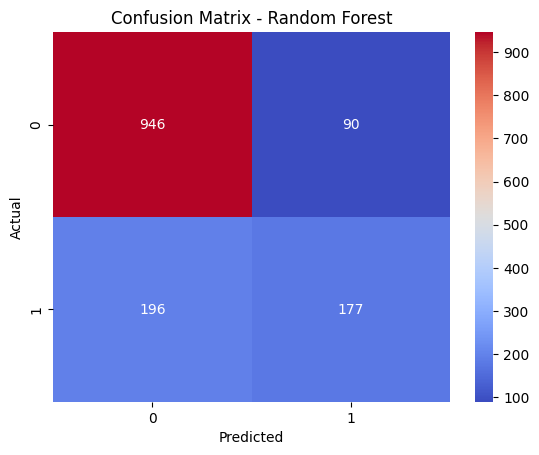

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()
